In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import tensorflow as tf
import timeit
import os
from six.moves import cPickle
from text_utils import TextLoader
from tensorflow.contrib import rnn
from char_rnn_model import Model
import numpy as np
import time
import matplotlib.pyplot as plt


# Define directories, hyperparameter

In [3]:
directory = "shakespeare.txt"
batch_size = 100
seq_len = 15
learning_rate = 0.001
num_layers = 2
rnn_size = 256
num_steps = 20

# Load data using TextLoader object

In [4]:
text_load = TextLoader(directory, batch_size, seq_len)
#text_train_in, text_valid_in, text_train_out, text_valid_out = text_load.split_data()
vocab_size = len(text_load.char)
vocab_reverse = text_load.vocab_reverse
print(vocab_size)

['\n' '\r' ' ' '!' '&' "'" ',' '-' '.' ':' ';' '?' 'a' 'b' 'c' 'd' 'e' 'f'
 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r' 's' 't' 'u' 'v' 'w' 'x'
 'y' 'z']
38


# Create your model object

In [5]:
the_model = Model(seq_len, rnn_size, num_layers, learning_rate, vocab_size)

#load the data
text_train_in = np.load("text_train_in.npy")
text_train_out = np.load("text_train_out.npy")
text_valid_in = np.load("text_valid_in.npy")
text_valid_out = np.load("text_valid_out.npy")

file_name = 'uni_char'
with open(file_name, 'rb') as handle:
    vocab = cPickle.load(handle)

print(text_train_in.shape)
print(text_train_out.shape)


start = "the king"
split = [[i for i in start]]
print(split[0][0])

val = split[0][0]

for i in range(len(split[0])):
    #print(type(split[0]))
    val = split[0][i]
    split[0][i] = [vocab[val]]
print(split)

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use keras.layers.flatten instead.
(900, 100, 15, 1)
(900, 100, 38)
t
[[[31], [19], [16], [2], [22], [20], [25], [18]]]


# Training

--- 28.986714601516724 seconds ---
step 1, Accuracy training= 2.521
step 1, Accuracy Valid= 2.444
--- 28.414992332458496 seconds ---
--- 28.214526891708374 seconds ---
step 3, Accuracy training= 2.261
step 3, Accuracy Valid= 2.258
--- 28.585535526275635 seconds ---
--- 28.301295280456543 seconds ---
step 5, Accuracy training= 2.103
step 5, Accuracy Valid= 2.119
--- 27.537801027297974 seconds ---
--- 28.085870265960693 seconds ---
step 7, Accuracy training= 1.989
step 7, Accuracy Valid= 2.053
--- 28.338229656219482 seconds ---
--- 28.468831300735474 seconds ---
step 9, Accuracy training= 1.895
step 9, Accuracy Valid= 2.021
--- 27.92628002166748 seconds ---
--- 27.648043155670166 seconds ---
step 11, Accuracy training= 1.816
step 11, Accuracy Valid= 1.993
--- 27.84351921081543 seconds ---
--- 27.69791054725647 seconds ---
step 13, Accuracy training= 1.748
step 13, Accuracy Valid= 2.003
--- 27.93128538131714 seconds ---
--- 28.782991886138916 seconds ---
step 15, Accuracy training= 1.691


Text(0.5, 1.0, 'Epoch vs accuracy')

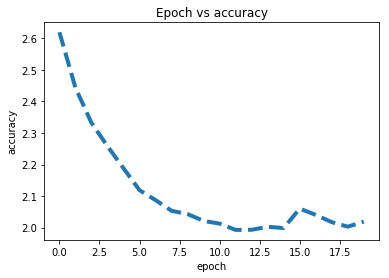

In [6]:
#Initialize the variables
def get_session():
    """Create a session that dynamically allocates memory."""
    # See: https://www.tensorflow.org/tutorials/using_gpu#allowing_gpu_memory_growth
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    session = tf.Session(config=config)
    return session
sess = get_session()
init = tf.global_variables_initializer()

acc_list = []
steps = []

test_range = []
correct_guess = []
net_guess = []

#with tf.Session() as sess:
sess.run(init)

for i in range(num_steps):
    start_time = time.time()
    #epoch training
    acc_t = 0
    for j in range(len(text_train_in)):
        #fetch batch
        batch_x = text_train_in[j]
        #print(batch_x.shape)
        batch_y = text_train_out[j]
        #print(batch_y.shape)
        #run optimization
        sess.run(the_model.train_op, feed_dict={the_model.X:batch_x, the_model.Y:batch_y})

        acc_t += sess.run(the_model.loss, feed_dict={the_model.X:batch_x, the_model.Y:batch_y})

    acc_t = acc_t/len(text_train_in)
    if (i+1) % (num_steps/10) == 0:
        print("step "+str(i)+", Accuracy training= {:.3f}".format(acc_t))

    #epoch validation
    acc = 0
    for j in range(len(text_valid_in)):
        #fetch batch
        batch_x = text_valid_in[j]
        batch_y = text_valid_out[j]
        #run optimization
        acc += sess.run(the_model.loss, feed_dict={the_model.X:batch_x, the_model.Y:batch_y})

    acc = acc/len(text_valid_in)
    if (i+1) % (num_steps/10) == 0:
        print("step "+str(i)+", Accuracy Valid= {:.3f}".format(acc))
    acc_list.append(acc)
    steps.append(i)

    print("--- %s seconds ---" % (time.time() - start_time))

print("Training finished!")

#string_back = the_model.sample(sess, vocab, vocab_reverse, 15, "first")
#string_round = np.round(string_back)
#print(string_back)
#print(string_back.shape)

'''
acc = 0
for k in range(len(tesla_test_in)):
#fetch batch
    batch_x = tesla_test_in[k]
    batch_y = tesla_test_out[k]
    #run optimization
    acc += sess.run(loss, feed_dict={X:batch_x, Y:batch_y})



acc = acc/len(tesla_test_in)
print("Test Accuracy= {:.3f}".format(acc))

#print("Testing Accuracy:", sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels}))

#print the first images
for i in range(100):

    batch_x = [preserve_tesla[i][0:5]]
    #batch_y = tesla_test_out[0]
    #run optimization
    guesses = sess.run(logits, feed_dict={X:batch_x})

    test_range.append(i)
    correct_guess.append(preserve_tesla[i][5])
    net_guess.append(guesses[0])

'''

#for images in range(10):
#    cur_img = batch_x[images]
#    b,g,r = cv2.split(cur_img)
#    frame_rgb = cv2.merge((r,g,b))
#    plt.imshow(frame_rgb)
#    print("Guess:", guesses[images])
#    plt.show()
    
plt.figure()
# plot epoch vs accuracy
plt.plot(steps,acc_list,'--',lw=4)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('Epoch vs accuracy')

#plt.figure()
# plot epoch vs accuracy
#plt.plot(test_range,correct_guess,'--',lw=4)
#plt.plot(test_range,net_guess,'--',lw=4)
#plt.ylabel('accuracy')
#plt.xlabel('epoch')
#plt.title('Epoch vs accuracy')

# Generating Text

In [9]:
input_string = text_train_in[0][0]
final_string = []


for i in range(len(input_string)):
    curr_val = input_string[i][0]
    curr_val = vocab_reverse[curr_val*vocab_size]
    #print(curr_val)
    final_string.append(curr_val)

print(final_string)
final_string = ''.join(final_string)
print(final_string)

string_back = the_model.sample(sess, vocab, vocab_reverse, 200, final_string)
#string_round = np.round(string_back)
#print(string_back)
print(''.join(string_back))


['t', ' ', 'i', 'n', 't', 'e', 'g', 'r', 'i', 't', 'y', ' ', 'w', 'h', 'i']
t integrity whi
t integrity which he their suibunes hn the people wour 
that hs the people of their latter oercl a metter for the people's andy.

menenius:
ho shall be so fore then and neren an his nefes orr and the hiart of min
